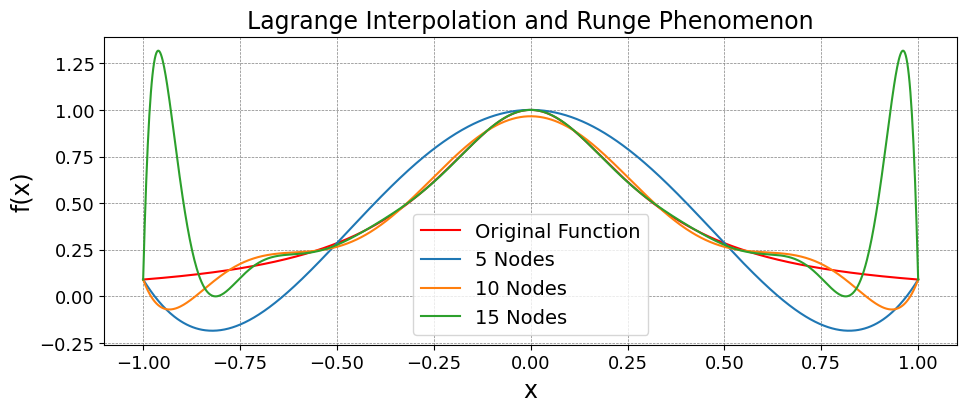

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f(x):
    return 1 / (1 + 10 * x**2)

# Lagrange interpolation function, using pure definition
def lagrange_interpolation1(x_nodes, y_nodes, x):
    n = len(x_nodes)
    result = 0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += term
    return result

# Lagrange interpolation function, using Lagrange's barycentric formula
def lagrange_interpolation2(x_nodes, y_nodes, x):
    n = len(x_nodes)
    up = 0
    down = 0
    for i in range(n):
        w_i = 1
        for j in range(n):
            if j != i:
                w_i *= 1 / (x_nodes[i] - x_nodes[j])
        up += w_i / (x - x_nodes[i]) * y_nodes[i]
        down += w_i / (x - x_nodes[i])
    return up / down
        

# Generate equidistant nodes
num_nodes = [5, 10, 15]  # Different numbers of nodes
x_plot = np.linspace(-1, 1, 1000)  # Continuous x values for plotting

plt.figure(figsize=(11, 4))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(x_plot, f(x_plot), color = 'red', label='Original Function')

for num in num_nodes:
    x_nodes = np.linspace(-1, 1, num)
    y_nodes = f(x_nodes)
    y_interp = lagrange_interpolation1(x_nodes, y_nodes, x_plot)
    plt.plot(x_plot, y_interp, label=f'{num} Nodes')

font = {'size': 17}
font2 = {'size': 14}
plt.title('Lagrange Interpolation and Runge Phenomenon', font)

plt.tick_params(labelsize=13)


plt.xlabel('x', font)
plt.ylabel('f(x)', font)
plt.legend(prop = font2)
plt.grid(True)
plt.savefig('Runge_phe1', dpi = 300)
plt.show()


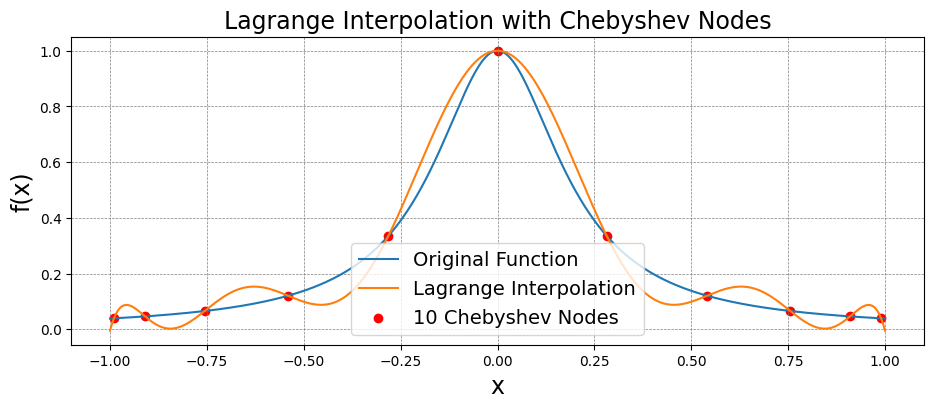

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be interpolated
def f(x):
    return 1/(1+25*x**2)

# Function to compute Chebyshev nodes
def chebyshev_nodes(n):
    k = np.arange(0, n+1)
    return np.cos((2*k + 1) * np.pi / (2*n + 2))

# Lagrange interpolation using Chebyshev nodes
def lagrange_interpolation(x_nodes, y_nodes, x):
    n = len(x_nodes)
    result = 0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += term
    return result

# Number of nodes
num_nodes = 10

# Generate Chebyshev nodes and corresponding function values
x_nodes = chebyshev_nodes(num_nodes)
y_nodes = f(x_nodes)

# Generate points for plotting the original function
x_values = np.linspace(-1, 1, 1000)
y_values = f(x_values)

# Perform Lagrange interpolation using Chebyshev nodes
y_interp = lagrange_interpolation(x_nodes, y_nodes, x_values)

# Plotting
plt.figure(figsize=(11, 4))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(x_values, y_values, label='Original Function')
plt.plot(x_values, y_interp, label='Lagrange Interpolation')
plt.scatter(x_nodes, y_nodes, color='red', label=f'{num_nodes} Chebyshev Nodes')
font = {'size': 17}
font2 = {'size': 14}
plt.title('Lagrange Interpolation with Chebyshev Nodes', font)
plt.xlabel('x', font)
plt.ylabel('f(x)', font)
plt.legend(prop = font2, loc=8)
plt.grid(True)
plt.savefig('chebyshev', dpi = 300)
plt.show()


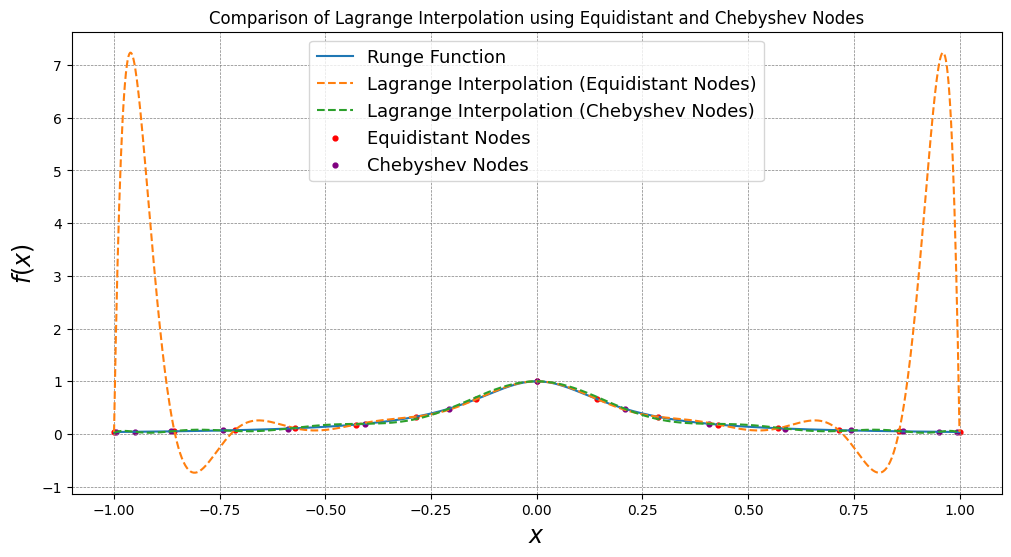

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Runge function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Lagrange interpolation function
def lagrange_interpolation(x_nodes, y_nodes, x):
    n = len(x_nodes)
    result = 0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += term
    return result

# Number of nodes
num_nodes = 15

# Generate equidistant nodes in the interval [-1, 1]
x_equidistant = np.linspace(-1, 1, num_nodes)
y_equidistant = runge_function(x_equidistant)

# Generate Chebyshev nodes in the interval [-1, 1]
x_chebyshev = np.cos((2*np.arange(0, num_nodes) + 1) * np.pi / (2*num_nodes))
y_chebyshev = runge_function(x_chebyshev)

# Generate points for plotting the original Runge function
x_values = np.linspace(-1, 1, 1000)
y_values = runge_function(x_values)

# Perform Lagrange interpolation using equidistant nodes
y_interp_equidistant = lagrange_interpolation(x_equidistant, y_equidistant, x_values)

# Perform Lagrange interpolation using Chebyshev nodes
y_interp_chebyshev = lagrange_interpolation(x_chebyshev, y_chebyshev, x_values)

# Plotting
plt.figure(figsize=(12, 6))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
font = {'size': 17}
font2 = {'size': 13}
plt.plot(x_values, y_values, linewidth = 1.5, label='Runge Function')
plt.plot(x_values, y_interp_equidistant, '--', linewidth = 1.5, label=f'Lagrange Interpolation (Equidistant Nodes)')
plt.plot(x_values, y_interp_chebyshev, '--', linewidth = 1.5, label=f'Lagrange Interpolation (Chebyshev Nodes)')
plt.scatter(x_equidistant, y_equidistant, color='red',s=12, label='Equidistant Nodes')
plt.scatter(x_chebyshev, y_chebyshev, color='purple', s=12, label='Chebyshev Nodes')
plt.title('Comparison of Lagrange Interpolation using Equidistant and Chebyshev Nodes')
plt.xlabel('$x$', font)
plt.ylabel('$f(x)$', font)
plt.legend(prop = font2, loc=9)
plt.grid(True)
plt.savefig('chebtshev comparision', dpi = 300)
plt.show()


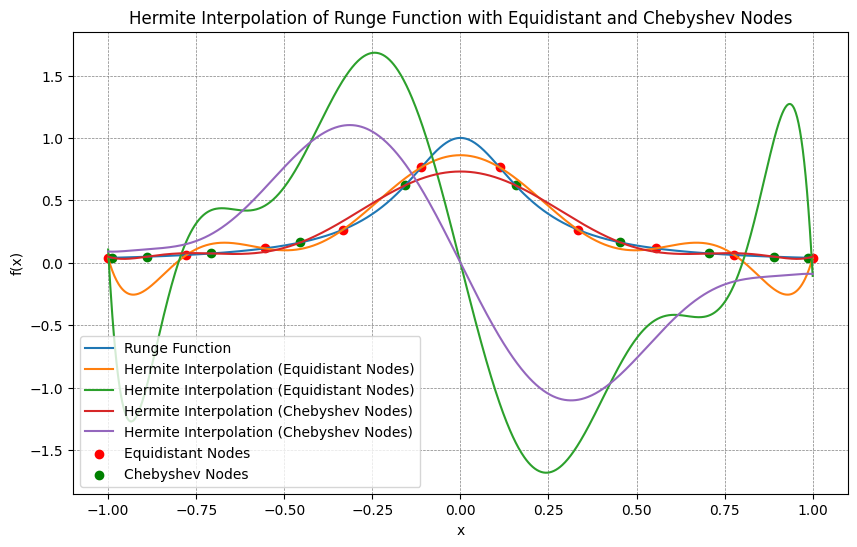

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Define the Runge function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Generate true values of the Runge function in the range [-1, 1]
x_true = np.linspace(-1, 1, 1000)
y_true = runge_function(x_true)

# Create a Hermite interpolation function
def hermite_interpolation(x_nodes, y_nodes, y_derivatives, x):
    return barycentric_interpolate(x_nodes, np.column_stack([y_nodes, y_derivatives]), x)

# Specify the number of nodes
num_nodes = 10

# Using equidistant nodes for Hermite interpolation
x_equidistant = np.linspace(-1, 1, num_nodes)
y_equidistant = runge_function(x_equidistant)
y_derivatives = np.gradient(y_equidistant, x_equidistant)  # Calculate derivative values using finite differences

# Using Chebyshev nodes for Hermite interpolation
x_chebyshev = np.cos((2*np.arange(0, num_nodes) + 1) * np.pi / (2*num_nodes))
y_chebyshev = runge_function(x_chebyshev)
y_derivatives_chebyshev = np.gradient(y_chebyshev, x_chebyshev)  # Calculate derivative values using finite differences

# Compute Hermite interpolation at interpolation points
y_interp_equidistant = hermite_interpolation(x_equidistant, y_equidistant, y_derivatives, x_true)
y_interp_chebyshev = hermite_interpolation(x_chebyshev, y_chebyshev, y_derivatives_chebyshev, x_true)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(x_true, y_true, label='Runge Function')
plt.plot(x_true, y_interp_equidistant, label='Hermite Interpolation (Equidistant Nodes)')
plt.plot(x_true, y_interp_chebyshev, label='Hermite Interpolation (Chebyshev Nodes)')
plt.scatter(x_equidistant, y_equidistant, color='red', label='Equidistant Nodes')
plt.scatter(x_chebyshev, y_chebyshev, color='green', label='Chebyshev Nodes')
plt.title('Hermite Interpolation of Runge Function with Equidistant and Chebyshev Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


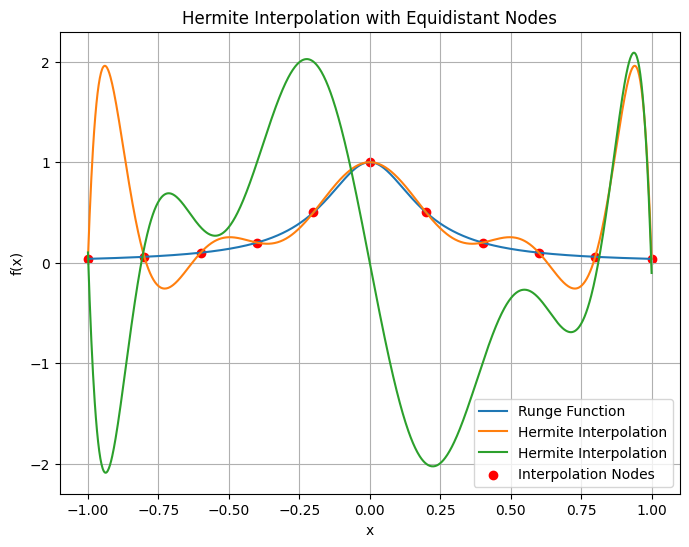

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Runge function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Hermite interpolation function
def hermite_interpolation(x_nodes, y_nodes, y_derivatives, x):
    return barycentric_interpolate(x_nodes, np.column_stack([y_nodes, y_derivatives]), x)

# Creating equidistant nodes
num_nodes = 11  # Number of nodes
x_nodes = np.linspace(-1, 1, num_nodes)
y_nodes = runge_function(x_nodes)
y_derivatives = np.gradient(y_nodes, x_nodes)  # Calculating derivative values

# Generating denser points within [-1, 1] for plotting
x_true = np.linspace(-1, 1, 1000)
y_true = runge_function(x_true)

# Performing Hermite interpolation
y_interp = hermite_interpolation(x_nodes, y_nodes, y_derivatives, x_true)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x_true, y_true, label='Runge Function')
plt.plot(x_true, y_interp, label='Hermite Interpolation')
plt.scatter(x_nodes, y_nodes, color='red', label='Interpolation Nodes')
plt.title('Hermite Interpolation with Equidistant Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
y_interp[0][0]

0.038461538461538464

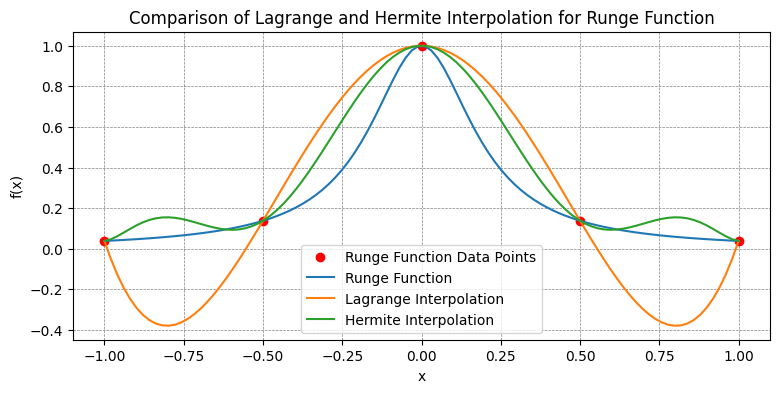

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Runge 函数
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Lagrange 插值函数
def lagrange_interpolation(X, Y, x):
    return barycentric_interpolate(X, Y, x)

# Hermite 插值函数
def hermite_interpolation(X, Y, Y1, x):
    if len(X) == len(Y) == len(Y1):
        n = len(X)
    else:
        print('x、y 和 y的导数维数不相等')
        return None
    
    m = len(x)
    y = np.zeros(m)
    
    for t in range(m):
        z = x[t]
        s = 0.0
        
        for i in range(n):
            h = 1.0
            a = 0.0
            
            for j in range(n):
                if j != i:
                    h *= (z - X[j])**2 / ((X[i] - X[j])**2)
                    a += 1 / (X[i] - X[j])
            
            s += h * ((X[i] - z) * (2 * a * Y[i] - Y1[i]) + Y[i])
        
        y[t] = s
    
    return y

# 生成 Runge 函数的数据点
X_runge = np.linspace(-1, 1, 5)
Y_runge = runge_function(X_runge)
Y1_runge = np.gradient(Y_runge, X_runge)

# 在更密集的区间上进行插值
x_interp = np.linspace(-1, 1, 100)

# Lagrange 插值
y_interp_lagrange = lagrange_interpolation(X_runge, Y_runge, x_interp)

# Hermite 插值
y_interp_hermite = hermite_interpolation(X_runge, Y_runge, Y1_runge, x_interp)

# 绘制插值结果
plt.figure(figsize=(9, 4))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(X_runge, Y_runge, 'ro', label='Runge Function Data Points')  # Runge 函数数据点
plt.plot(x_interp, runge_function(x_interp), label='Runge Function')  # Runge 函数
plt.plot(x_interp, y_interp_lagrange, label='Lagrange Interpolation')  # Lagrange 插值结果
plt.plot(x_interp, y_interp_hermite, label='Hermite Interpolation')  # Hermite 插值结果
plt.title('Comparison of Lagrange and Hermite Interpolation for Runge Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.savefig('hermite lagrange', dpi = 300)
plt.show()


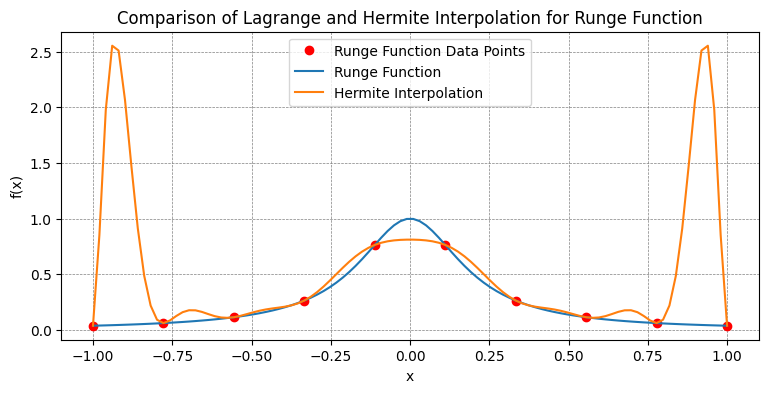

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Runge 函数
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Lagrange 插值函数
def lagrange_interpolation(X, Y, x):
    return barycentric_interpolate(X, Y, x)

# Hermite 插值函数
def hermite_interpolation(X, Y, Y1, x):
    if len(X) == len(Y) == len(Y1):
        n = len(X)
    else:
        print('x、y 和 y的导数维数不相等')
        return None
    
    m = len(x)
    y = np.zeros(m)
    
    for t in range(m):
        z = x[t]
        s = 0.0
        
        for i in range(n):
            h = 1.0
            a = 0.0
            
            for j in range(n):
                if j != i:
                    h *= (z - X[j])**2 / ((X[i] - X[j])**2)
                    a += 1 / (X[i] - X[j])
            
            s += h * ((X[i] - z) * (2 * a * Y[i] - Y1[i]) + Y[i])
        
        y[t] = s
    
    return y

# 生成 Runge 函数的数据点
X_runge = np.linspace(-1, 1, 10)
Y_runge = runge_function(X_runge)
Y1_runge = np.gradient(Y_runge, X_runge)

# 在更密集的区间上进行插值
x_interp = np.linspace(-1, 1, 100)

# Lagrange 插值
y_interp_lagrange = lagrange_interpolation(X_runge, Y_runge, x_interp)

# Hermite 插值
y_interp_hermite = hermite_interpolation(X_runge, Y_runge, Y1_runge, x_interp)

# 绘制插值结果
plt.figure(figsize=(9, 4))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(X_runge, Y_runge, 'ro', label='Runge Function Data Points')  # Runge 函数数据点
plt.plot(x_interp, runge_function(x_interp), label='Runge Function')  # Runge 函数
# plt.plot(x_interp, y_interp_lagrange, label='Lagrange Interpolation')  # Lagrange 插值结果
plt.plot(x_interp, y_interp_hermite, label='Hermite Interpolation')  # Hermite 插值结果
plt.title('Comparison of Lagrange and Hermite Interpolation for Runge Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.savefig('hermite', dpi = 300)
plt.show()
